<a href="https://colab.research.google.com/github/HuangJin-De/am_NH/blob/main/discussion/20231108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! rm -rf am_NH
! git clone https://github.com/HuangJin-De/am_NH.git

Cloning into 'am_NH'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 98 (delta 29), reused 85 (delta 23), pack-reused 0
Receiving objects: 100% (98/98), 2.79 MiB | 24.20 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

path='am_NH'
filen=path+'/train_data/zm_10days_data.dat'

data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(-1,42)

y1=np.copy(data[:,0])
print(y1[0:10])
y2=np.copy(data[:,1])
print(y2[0:10])
x=np.copy(data[:,2:43])

print(y1.shape,y2.shape,x.shape)



[ 0.0833049  -1.0930462  -1.3138411  -0.75141543 -0.5470629   0.33093917
  0.02753482 -1.3000826   0.44190055  1.824813  ]
[ 0.81427157 -0.04958611 -0.70947564  0.5993808   1.0594871  -0.33536747
 -1.3672273  -0.12659782 -0.5226433  -0.6045729 ]
(4662,) (4662,) (4662, 40)


Start the multiple linear regression

mean_squared_error :  0.5148578


Text(0.5, 1.0, 'regression coefficients of m1 and m2')

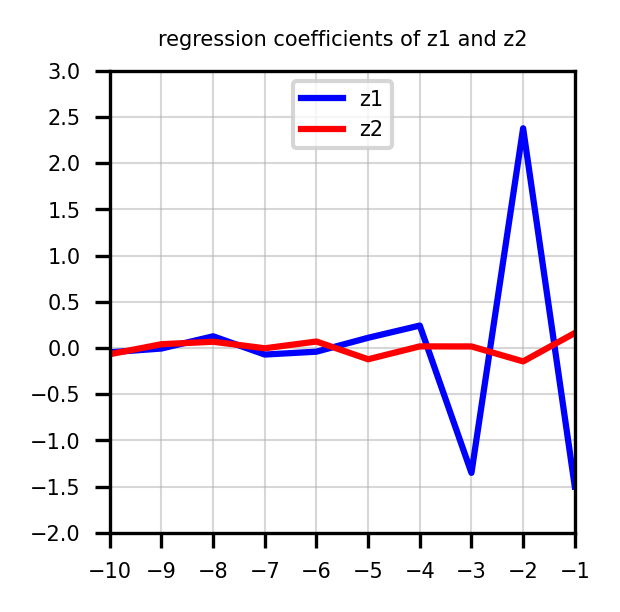

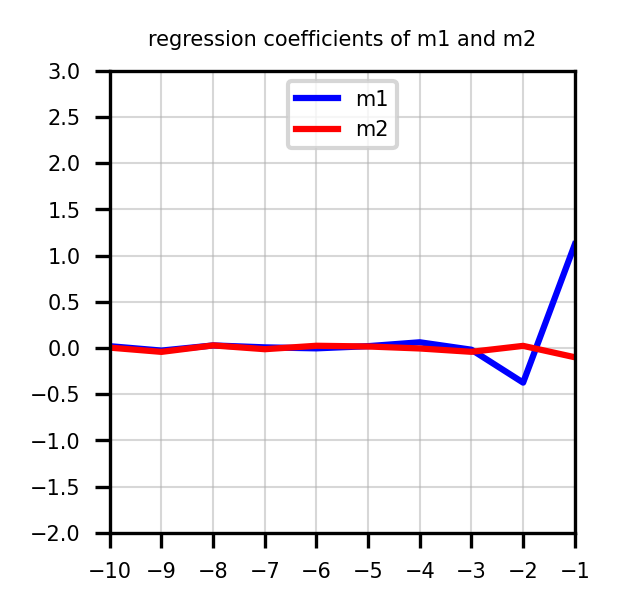

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


x_train=x
x_test=x
y1_train=y1
y1_test=y1
y2_train=y2
y2_test=y2

#x_train, x_test, y1_train, y1_test = train_test_split(
#    x, y1, test_size=0.1, random_state=101)

model_m1 = LinearRegression()
model_m1.fit(x_train,y1_train)

predictions = model_m1.predict(x_test)

#print(y1_test[0:10],predictions[0:10])

print('mean_squared_error : ', mean_squared_error(y1_test, predictions))
#print('mean_absolute_error : ', mean_absolute_error(y1_test, predictions))

#print("Intercept: ", model_m1.intercept_)
#print("Coefficients:", model_m1.coef_)

inter_m1=model_m1.intercept_
coef_m1=model_m1.coef_.reshape(4,10)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(np.arange(-10,0),coef_m1[0,:],'b',np.arange(-10,0),coef_m1[1,:],'r')
ax.tick_params(labelsize=5)
plt.legend(["z1","z2"],fontsize=5,loc=9)
ax.set_ylim([-2,3])
ax.set_yticks(np.arange(-2,3.1,0.5))
ax.set_xlim([-10,-1])
ax.set_xticks(np.arange(-10,-0.9,1))
ax.grid(lw=0.5,alpha=0.5)
ax.set_title('regression coefficients of z1 and z2',fontsize=5)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(np.arange(-10,0),coef_m1[2,:],'b',np.arange(-10,0),coef_m1[3,:],'r')
ax.tick_params(labelsize=5)
plt.legend(["m1","m2"],fontsize=5,loc=9)
ax.set_ylim([-2,3])
ax.set_yticks(np.arange(-2,3.1,0.5))
ax.set_xlim([-10,-1])
ax.set_xticks(np.arange(-10,-0.9,1))
ax.grid(lw=0.5,alpha=0.5)
ax.set_title('regression coefficients of m1 and m2',fontsize=5)

mean_squared_error :  0.5541106


Text(0.5, 1.0, 'regression coefficients of m1 and m2')

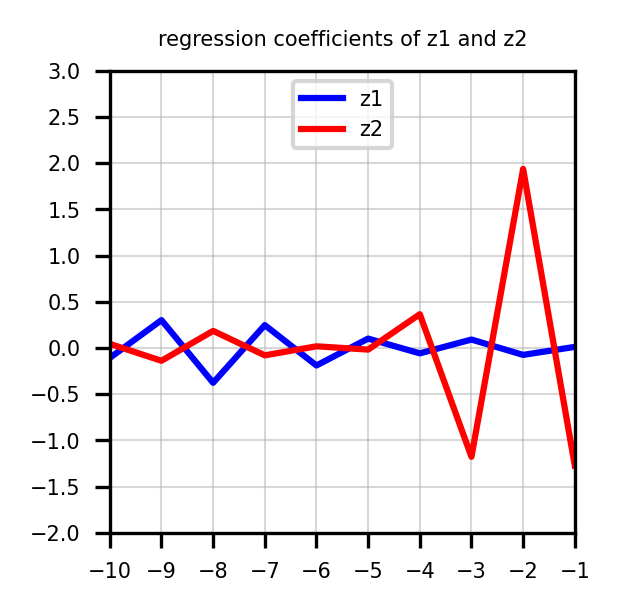

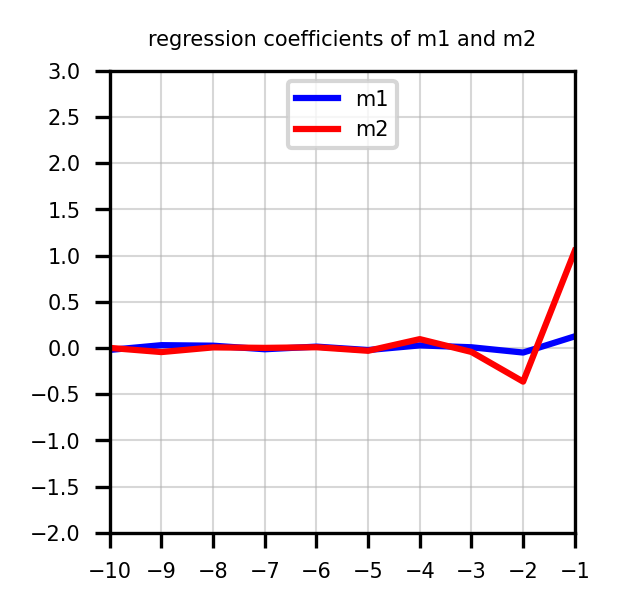

In [15]:
model_m2 = LinearRegression()
model_m2.fit(x_train,y2_train)

predictions = model_m2.predict(x_test)

#print(y2_test[0:10],predictions[0:10])

print('mean_squared_error : ', mean_squared_error(y2_test, predictions))
#print('mean_absolute_error : ', mean_absolute_error(y2_test, predictions))

#print("Intercept: ", model_m2.intercept_)
#print("Coefficients:", model_m2.coef_)

inter_m2=model_m2.intercept_
coef_m2=model_m2.coef_.reshape(4,10)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(np.arange(-10,0),coef_m2[0,:],'b',np.arange(-10,0),coef_m2[1,:],'r')
ax.tick_params(labelsize=5)
plt.legend(["z1","z2"],fontsize=5,loc=9)
ax.set_ylim([-2,3])
ax.set_yticks(np.arange(-2,3.1,0.5))
ax.set_xlim([-10,-1])
ax.set_xticks(np.arange(-10,-0.9,1))
ax.grid(lw=0.5,alpha=0.5)
ax.set_title('regression coefficients of z1 and z2',fontsize=5)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(np.arange(-10,0),coef_m2[2,:],'b',np.arange(-10,0),coef_m2[3,:],'r')
ax.tick_params(labelsize=5)
plt.legend(["m1","m2"],fontsize=5,loc=9)
ax.set_ylim([-2,3])
ax.set_yticks(np.arange(-2,3.1,0.5))
ax.set_xlim([-10,-1])
ax.set_xticks(np.arange(-10,-0.9,1))
ax.grid(lw=0.5,alpha=0.5)
ax.set_title('regression coefficients of m1 and m2',fontsize=5)

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

y=np.copy(data[:,0:2])
print(y.shape)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

class TrainData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.x_data)

train_data=TrainData(torch.FloatTensor(x_train),torch.FloatTensor(y_train))
test_data=TrainData(torch.FloatTensor(x_test),torch.FloatTensor(y_test))

BATCH_SIZE=64
train_loader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE)
test_loader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE)


print('finished')

(4662, 2)
finished


In [18]:
from torch import nn
from torchvision.transforms import ToTensor, Lambda, Compose
import time

class Predict_m(nn.Module):
  def __init__(self):
    super(Predict_m, self).__init__()
    self.PM = nn.Sequential(
      nn.Linear(40, 128),
      nn.ReLU(),
      nn.BatchNorm1d(128),
      nn.Linear(128, 64),
      nn.ReLU(),
      nn.BatchNorm1d(64),
      nn.Dropout(p=0.1),
      nn.Linear(64, 1)
    )

  def forward(self, x):
    freq = self.PM(x)
    return freq

print('defined model')

defined model


In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = Predict_m().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.train()
    train_loss=0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    return train_loss

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)

    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    print(f"Avg loss: {test_loss:>8f}")
    return test_loss

# training start
epochs=100

tt=time.time()
train_loss=[]
test_loss=[]
for t in range(epochs):
    print(f"Epoch {t+1}-------------------------------")
    loss = train(train_loader, model, loss_fn, optimizer)
    train_loss.append(loss)
    loss = test(test_loader, model, loss_fn)
    test_loss.append(loss)

elapse=time.time()-tt
print(elapse)

torch.save(model.state_dict(),'model.pkl')


Epoch 1-------------------------------
Avg loss: 1.077777
Epoch 2-------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 2])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([17, 2])) that is different to the input size (torch.Size([17, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([37, 2])) that is different to the input size (torch.Size([37, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_lo

Avg loss: 0.993360
Epoch 3-------------------------------
Avg loss: 0.946423
Epoch 4-------------------------------
Avg loss: 0.917653
Epoch 5-------------------------------
Avg loss: 0.897158
Epoch 6-------------------------------
Avg loss: 0.882130
Epoch 7-------------------------------
Avg loss: 0.870523
Epoch 8-------------------------------
Avg loss: 0.861728
Epoch 9-------------------------------
Avg loss: 0.854601
Epoch 10-------------------------------
Avg loss: 0.848907
Epoch 11-------------------------------
Avg loss: 0.843589
Epoch 12-------------------------------
Avg loss: 0.839663
Epoch 13-------------------------------
Avg loss: 0.836394
Epoch 14-------------------------------
Avg loss: 0.833074
Epoch 15-------------------------------
Avg loss: 0.829944
Epoch 16-------------------------------
Avg loss: 0.827576
Epoch 17-------------------------------
Avg loss: 0.825653
Epoch 18-------------------------------
Avg loss: 0.824279
Epoch 19-------------------------------
Avg 

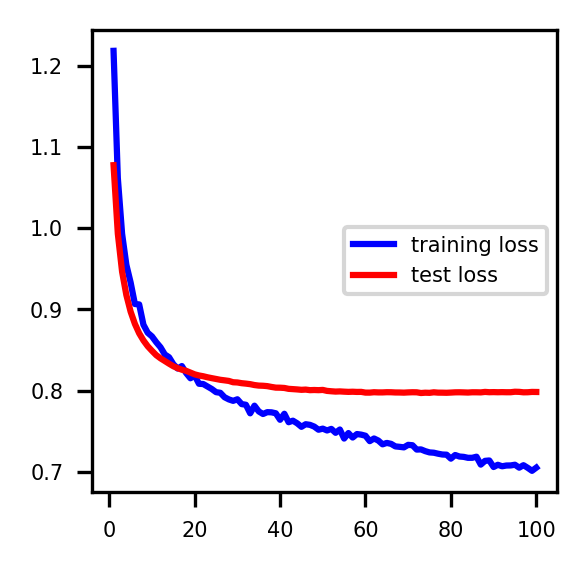

In [27]:
fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(np.arange(1,epochs+1),train_loss,'b',np.arange(1,epochs+1),test_loss,'r')
ax.tick_params(labelsize=5)
plt.legend(["training loss","test loss"],fontsize=5,loc=7)
